In [81]:
import pandas as pd
import numpy as np
import six
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

df_lines = pd.read_csv("TheOfficeLinesPerCharacter.csv")
df_rating = pd.read_csv("TheOfficeIMDBPerEpisode.csv")

#Set up my master table
df_master = pd.DataFrame(columns = ["season", "episode", "rating"])
characters = df_lines.speaker.value_counts().reset_index(name="count").query("count > 100")["index"]

#Set up season, episode, and rating
episode = 1
season = 1
for i in range(len(df_rating.index)):
    if(season != df_rating.iloc[i]['Season']):
        episode = 1
        season += 1 
    df_master = df_master.append({'season': season, 'episode': episode, 'rating':df_rating.iloc[i]['Rating']}, ignore_index=True)
    episode += 1
      
#Add characters columns
for character in characters:
    df_master[str(character)] = np.NaN
    
#Add lines spoken count for each character
for j in range(len(df_lines.index)):
    speaker = df_lines.iloc[j]['speaker']
    if speaker in df_master.columns:
        season = df_lines.iloc[j]['season']
        episode = df_lines.iloc[j]['episode']
        index = df_master.loc[df_master['season']==season].loc[df_master['episode']==episode].index.values.astype(int)[0]
        if(pd.isna(df_master.at[index,speaker])):
            df_master.at[index,speaker] = 1
        else:
            df_master.at[index,speaker] += 1
    
#Clean up David's data
David_Wallace = df_master['David'] + df_master['David Wallace']
df_master['David'] = David_Wallace
df_master = df_master.drop(columns=['David Wallace'])

df_master.head(5)



,season,episode,rating,Michael,Dwight,Jim,Pam,Andy,Kevin,Angela,Oscar,Erin,Ryan,Darryl,Phyllis,Kelly,Jan,Toby,Stanley,Meredith,Holly,Nellie,Creed,Gabe,Robert,David,Karen,Clark,Roy,Charles,Pete,Jo,Deangelo
0,1.0,1.0,7.5,97.0,35.0,37.0,46.0,NaN,2.0,5.0,6.0,NaN,10.0,NaN,2.0,NaN,12.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
1,1.0,2.0,8.3,103.0,40.0,35.0,26.0,NaN,8.0,4.0,13.0,NaN,7.0,NaN,NaN,2.0,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,3.0,7.8,69.0,88.0,57.0,44.0,NaN,6.0,5.0,16.0,NaN,1.0,NaN,NaN,NaN,18.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,4.0,8.1,111.0,74.0,63.0,37.0,NaN,3.0,9.0,20.0,NaN,5.0,NaN,5.0,NaN,NaN,7.0,2.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,1.0,5.0,8.4,134.0,45.0,27.0,17.0,NaN,4.0,6.0,2.0,NaN,8.0,17.0,4.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN


In [90]:
#Remove character that appeared in less than 30 episodes
TF = (df_master.isnull())

for col in TF.columns:
        if (TF[col].value_counts()[0] < 30):
            df_master = df_master.drop(columns=[col])
df_master.head()

,season,episode,rating,Michael,Dwight,Jim,Pam,Andy,Kevin,Angela,Oscar,Erin,Ryan,Darryl,Phyllis,Kelly,Jan,Toby,Stanley,Meredith,Nellie,Creed,Gabe,Roy
0,1.0,1.0,7.5,97.0,35.0,37.0,46.0,NaN,2.0,5.0,6.0,NaN,10.0,NaN,2.0,NaN,12.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0
1,1.0,2.0,8.3,103.0,40.0,35.0,26.0,NaN,8.0,4.0,13.0,NaN,7.0,NaN,NaN,2.0,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN
2,1.0,3.0,7.8,69.0,88.0,57.0,44.0,NaN,6.0,5.0,16.0,NaN,1.0,NaN,NaN,NaN,18.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN
3,1.0,4.0,8.1,111.0,74.0,63.0,37.0,NaN,3.0,9.0,20.0,NaN,5.0,NaN,5.0,NaN,NaN,7.0,2.0,15.0,NaN,NaN,NaN,3.0
4,1.0,5.0,8.4,134.0,45.0,27.0,17.0,NaN,4.0,6.0,2.0,NaN,8.0,17.0,4.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,13.0


In [91]:
#This class was found on stack overflow and simply renders images of my dataframes.
#I am not responsible for this code

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#3b3b3b', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

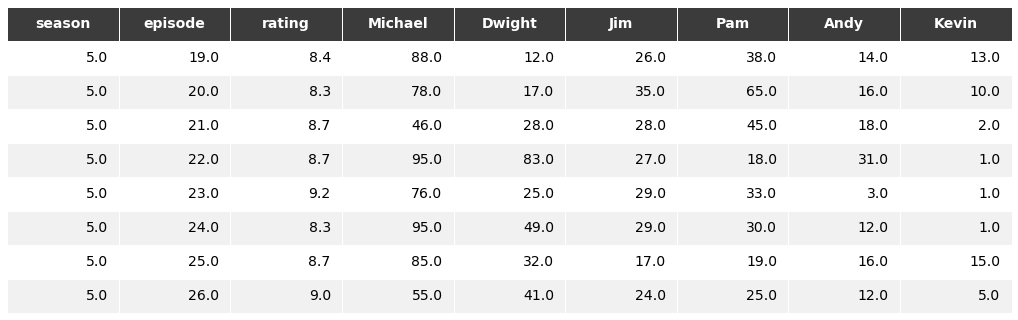

In [92]:
season5 = df_master.loc[df_master['season'] == 5.0]

pd.set_option('display.max_columns', None)
render_mpl_table(season5.iloc[18:26, 0:9], header_columns=0, col_width=2.0)



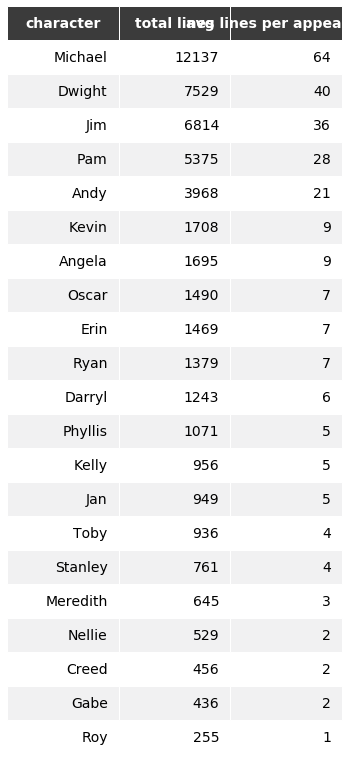

In [93]:
#Create a second more condense dataset
df_condensed = pd.DataFrame(columns = ["character", "total lines", "avg lines per appearance"])

total_line = df_master.sum(axis=0)
for k in range(3, df_master.shape[1]):
    character = df_master.columns[k]
    total_appearence = len(df_master[character].loc[df_master[character] != 0])
    
    row = {"character" : character, "total lines" : int(total_line[k]), "avg lines per appearance" : int(total_line[k]/total_appearence)}
    df_condensed = df_condensed.append(row, ignore_index=True)
    
render_mpl_table(df_condensed, header_columns=0, col_width=2.0)

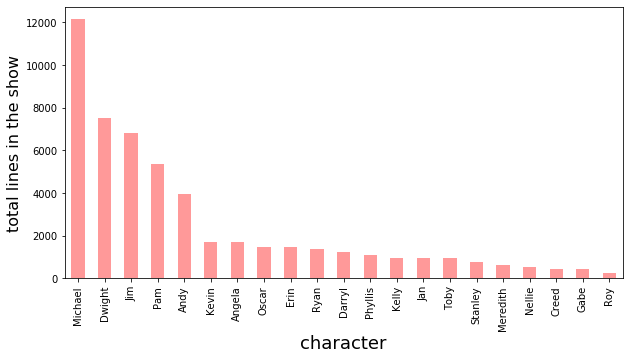

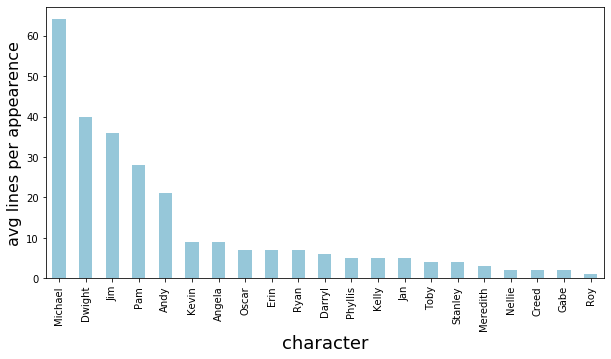

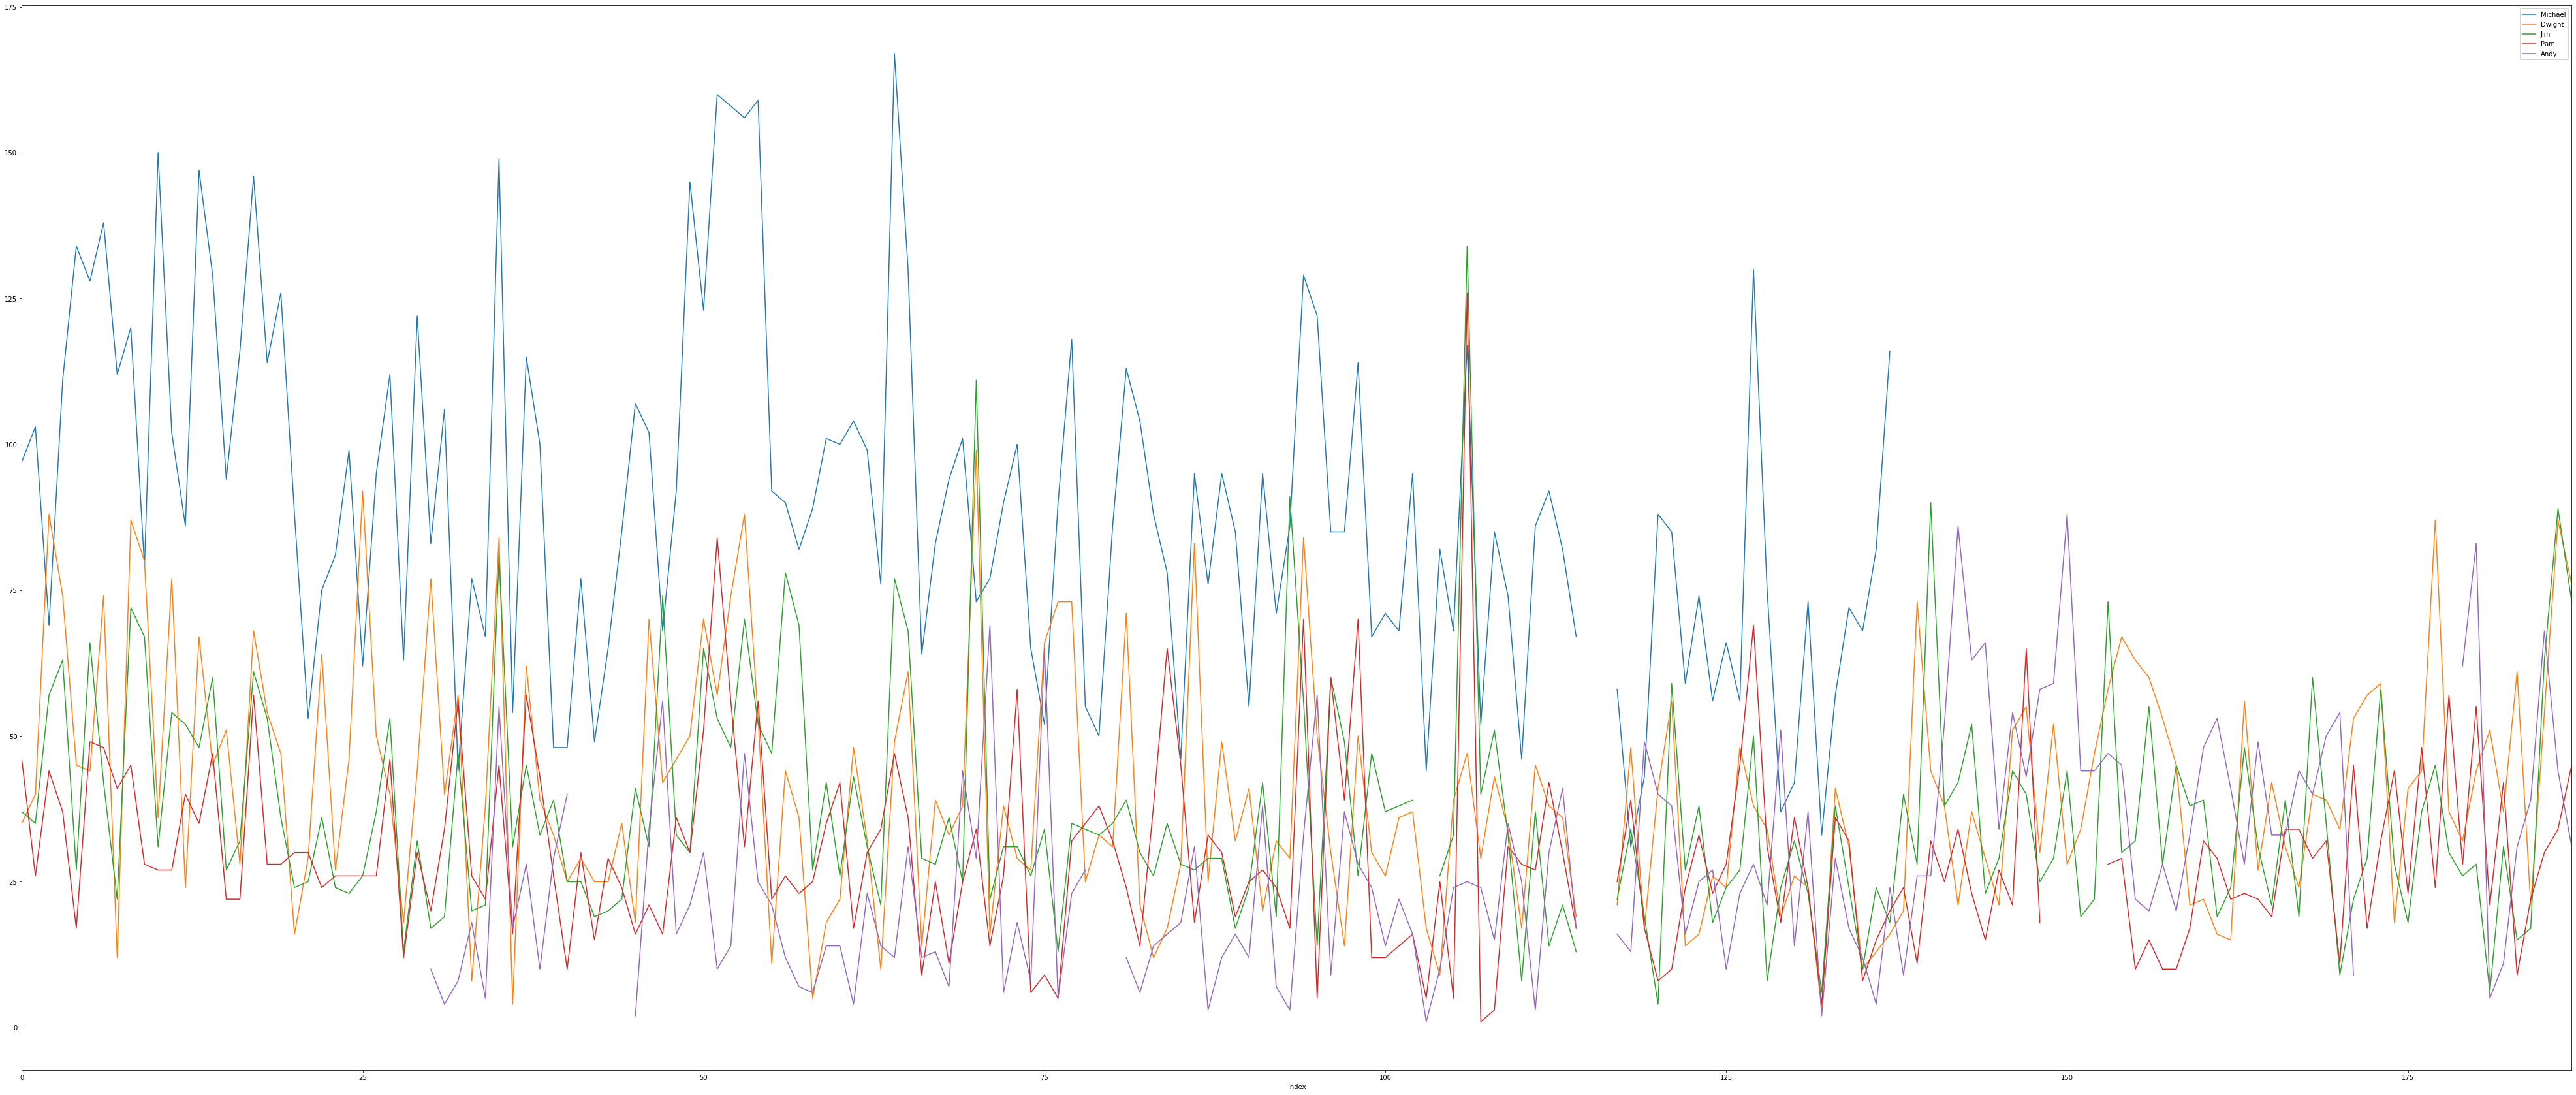

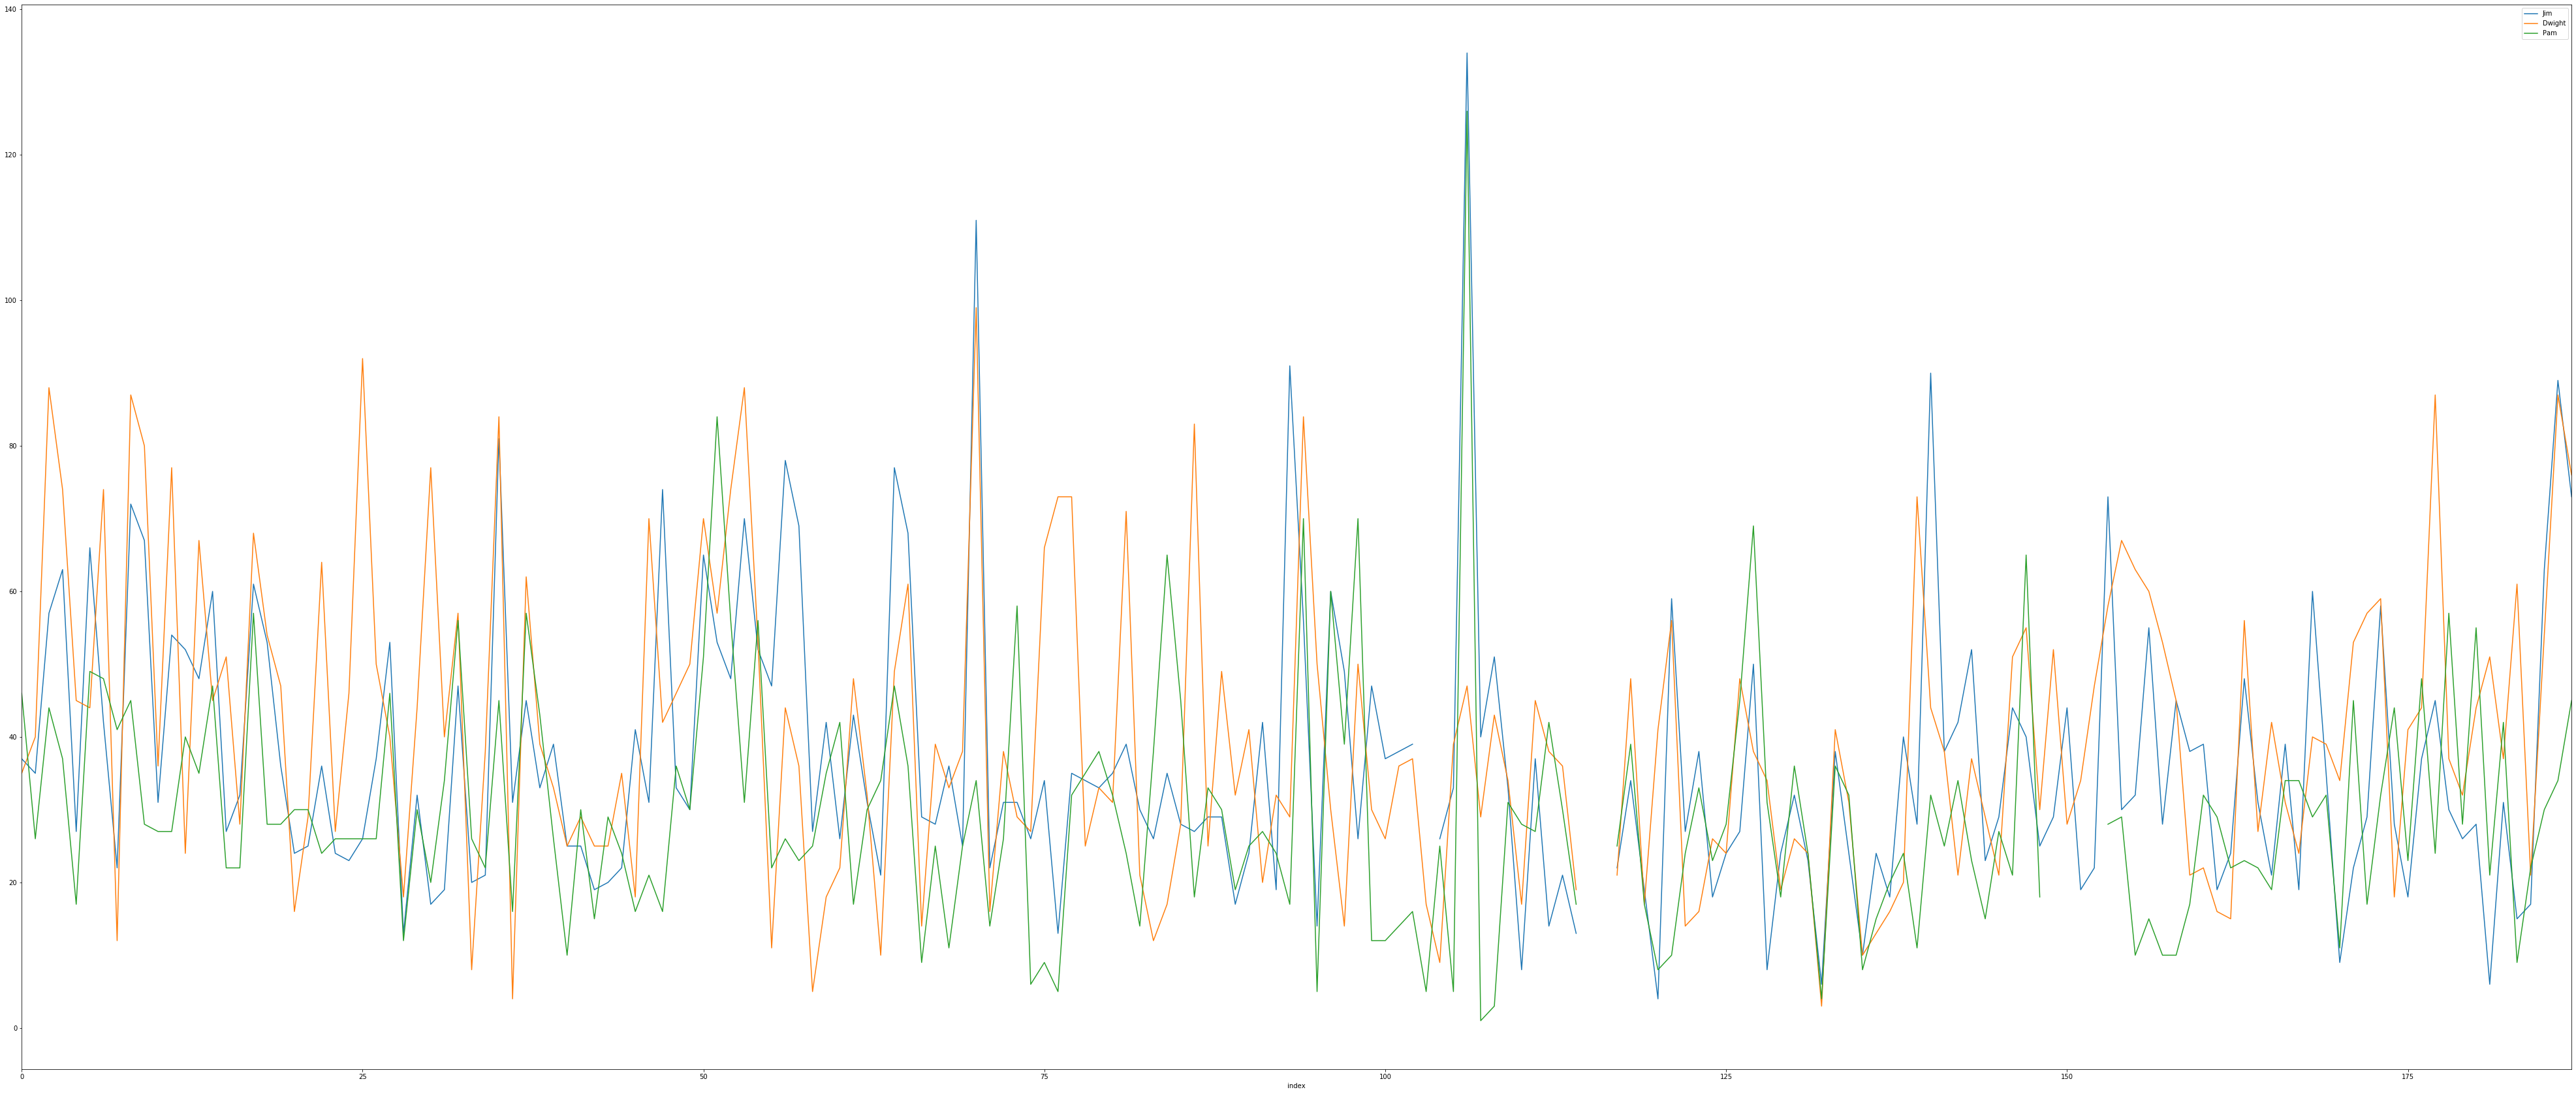

In [94]:
#Graph the current data
df_condensed.plot(x ='character', y='total lines', kind = 'bar', color='#ff9999', figsize=(10,5), legend=None)
plt.xlabel('character', fontsize=18)
plt.ylabel('total lines in the show', fontsize=16)
plt.show()

df_condensed.plot(x ='character', y='avg lines per appearance', kind = 'bar', color='#96c7d9', figsize=(10,5), legend=None)
plt.xlabel('character', fontsize=18)
plt.ylabel('avg lines per appearence', fontsize=16)
plt.show()

characters = df_condensed.sort_values(by='total lines', ascending=False)['character'].astype(str).values.tolist()
df_master.reset_index().plot(x='index', y = characters[:5], kind='line', figsize=(70,30))
plt.show()

df_master.reset_index().plot(x='index', y = ["Jim", "Dwight", "Pam"], kind='line', figsize=(70,30))
plt.show()

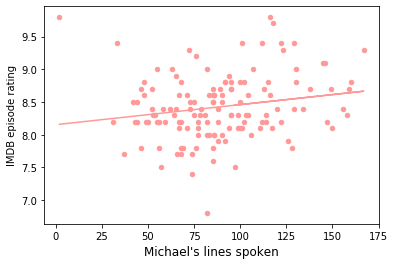

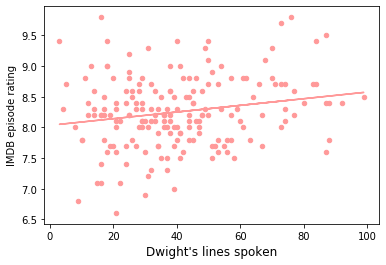

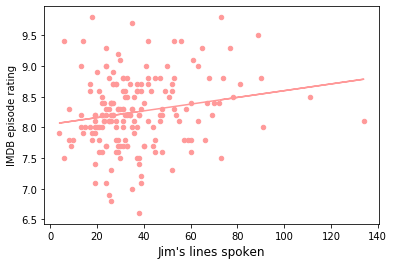

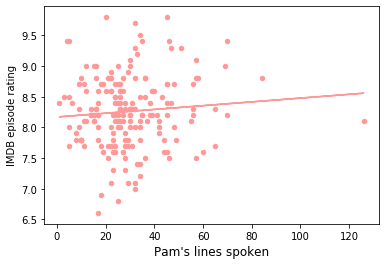

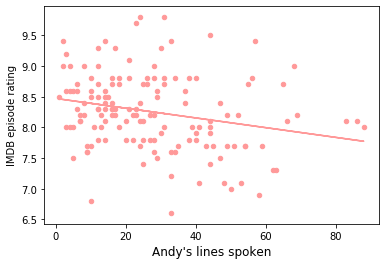

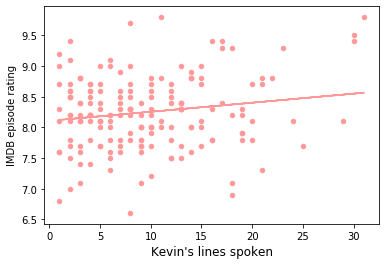

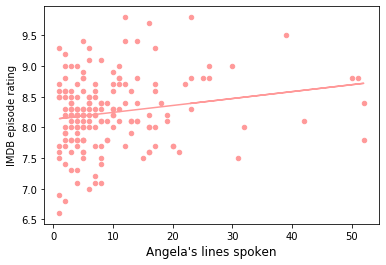

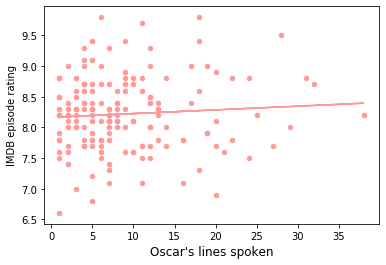

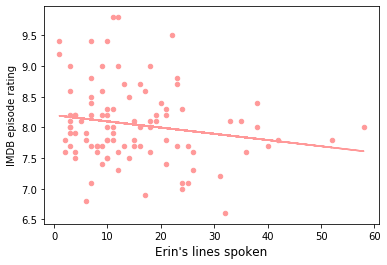

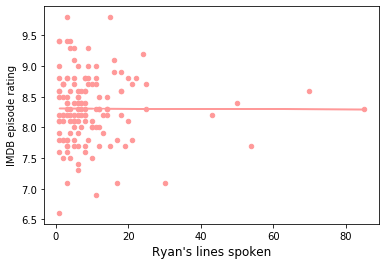

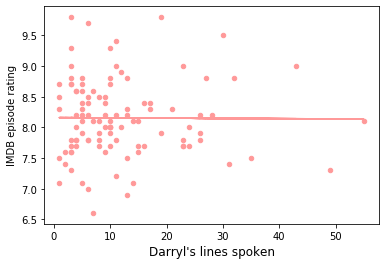

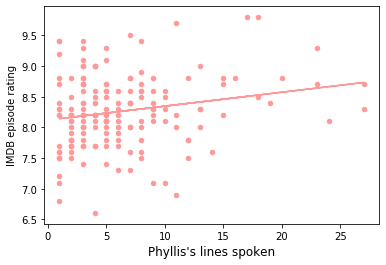

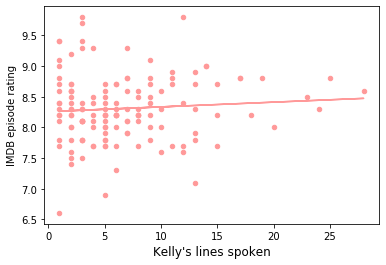

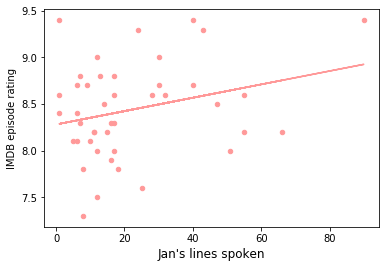

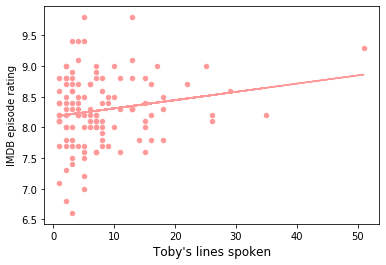

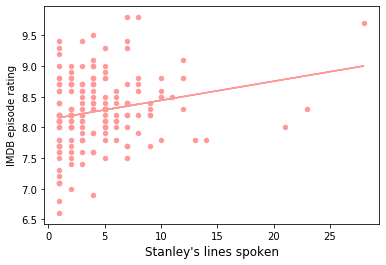

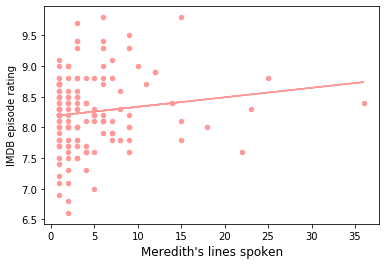

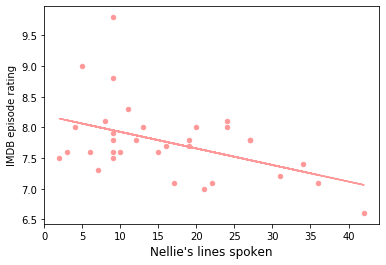

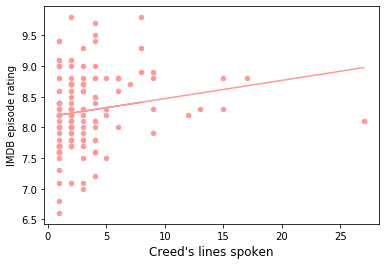

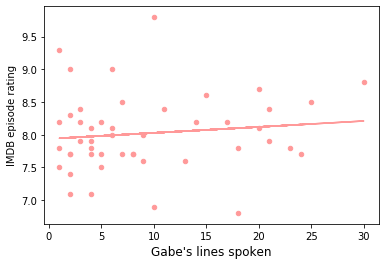

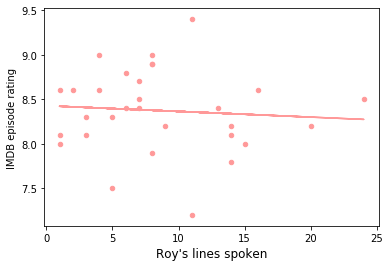

In [151]:
import random
#Calculate correlation between a given character's line count and the episode rating


for char in df_condensed['character']:
    character = char
    df = df_master[['rating',character]].dropna()
    x = df[character].to_numpy()
    y = df['rating'].to_numpy()
    dem = x.dot(x) - x.mean() * x.sum()
    m = (x.dot(y) - y.mean() * x.sum())/dem
    b = (y.mean() * x.dot(x) - x.mean() * x.dot(y))/dem
    line = m*x + b

    df_master.plot(x = character, y='rating', kind = 'scatter', color='#ff9999', legend=None)
    plt.plot(x, line, '#ff9999')
    plt.xlabel(character + "'s lines spoken", fontsize=12)
    plt.ylabel("IMDB episode rating")
    plt.show()
    
    df_condensed[0,character]

